# ROC Curve and Threshold

## Introduction 
In this notebook, you will learn about the **Receiver Operating Characteristic** (ROC) curve and its applications, as well as understand how changing the threshold of decision in a predictor impacts the outcome.

The ROC curve aims to measure the quality of a **binary estimator**, as it considers how the estimator is able to split between both classes, as we **vary the decision threshold**, i.e., as we vary the *value* where we consider a specific point as being part of class 0 or class 1. Usually, estimators use $0.5$ to split the classes, so if for a given point, the estimator returns $0.8$, then we classify the point as 1, whereas if a point has a predicted score of $0.3$ we classify it as $0$. 

Let's just recall some definitions:

- `True Positive (TP)`: The model classifies the example as positive, and the actual label also positive.
- `False Positive (FP)`: The model classifies the example as positive, **but** the actual label is negative.
- `True Negative (TN)`: The model classifies the example as negative, and the actual label is also negative.
- `False Negative (FN)`: The model classifies the example as negative, **but** the label is actually positive.

To define and plot the ROC curve, we must define two quantities, the **False Positive Rate (FPR)** and the **True Positive Rate (TPR)**. Since both definitions are about the prevalence of false positive and true positive in our estimations and both definitions depends on the **threshold** we use to decide whether a point belongs to the positive class or the negative class, both **FPR** and **TPR** (as well TP, FP, TN and FN) are a function of the **decision threshold** (we will denote it by $th$) we use to classify the examples. Since the estimator predicts a probability, we thus have that $th \in \left[0,1\right]$.

Let's load the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
np.random.seed(42) ## This line helps the reproducibility of the values

The next cell will load a toy dataset (created for particular notebook), consisting of predicted values for a given point and a given estimator and the truth values of those examples. 

In [2]:
y = np.loadtxt('data/y_true_balanced_set.txt')
pred = np.loadtxt('data/pred_balanced_set.txt')

First let's have a look on the distribution of positive and negative classes in this set.

In [3]:
print(f"Proportion of positives: {np.sum(y==1)/len(y)}")
print(f"Proportion of negatives: {np.sum(y==0)/len(y)}")

Proportion of positives: 0.6
Proportion of negatives: 0.4


Now let's suppose the standard threshold, $th = 0.5$ and get the values of **TN**, **TP**, **FN** and **FP**. 

In [4]:
pred_threshold = pred >= 0.5

TN = np.sum((y == 0) & (pred_threshold == 0))
TP = np.sum((y == 1) & (pred_threshold == 1))
FN = np.sum((y == 1) & (pred_threshold == 0))
FP = np.sum((y == 0) & (pred_threshold == 1))

In [5]:
print(f"Number of examples: {len(y)}\nNumber of True Negatives: {TN}\nNumber of True Positives: {TP}\nNumber of False Negatives: {FN}\nNumber of False Positives: {FP}")

Number of examples: 300
Number of True Negatives: 101
Number of True Positives: 177
Number of False Negatives: 3
Number of False Positives: 19


It looks like the estimator is quite good!

## FPR, TPR and Precision

The **False Positive Rate** is defined as follows:

$$ FPR = \frac{FP}{FP+TN} $$

Let's dig into this quantity. The denominator consists of all examples that are in the **negative** class (which may be correctly classified by the estimator, thus returning a **True Negative** or it may be wrongly classified by the estimator, therefore generating a **False Positive**). The numerator is the number of **False Positives**. So, the **FPR** measures, between all **negative** values the estimator produces, which ones are incorrect. In other words, the **FPR** measures how likely the estimator will give a *false alarm*. A simple calculation shows that $FPR = 1 - \text{specificity}$.


The **True Positive Rate** is defined as follows:

$$ TPR = \frac{TP}{TP + FN} $$

The **TPR** is the same as the **sensitivity**, i.e., the probability that the estimator will output a positive class when the point is in fact positive (this is also called the **recall**).

A third metric that is quite useful to understand the estimator is the **precision**, defined as:

$$\text{precision} = \frac{TP}{TP + FP}$$


Note that $\text{precision} = PPV$. This quantity measures the *relevance* of the *alarmed cases*. In other words, it measures, between all examples the estimator classifies as positive, how many are in fact positive.


In [6]:
# Let's compute the FPR, TPR, and Precision for the data examples we loaded. 
# We will use two functions from the utils library
# called get_fpr and get_tpr. You can take a look at them using help(get_tpr) and help(get_fpr)!

FPR = get_fpr(y,pred)
TPR = get_tpr(y,pred)
precision = TP/(TP+FP)

print(f"FPR (1 - specificity): {FPR:.4f}\nTPR (sensitivity or recall): {TPR:.4f}\nPrecision: {precision:.4f}\nSpecificity: {(1-FPR):.4f}")

FPR (1 - specificity): 0.1583
TPR (sensitivity or recall): 0.9833
Precision: 0.9031
Specificity: 0.8417


Of course, an ideal estimator would be fully precise (no false positives between the positively classified) and would be able to identify every positive point (every positive point would be identified as positive). However, in real world applications, this is not possible due to the random nature of the distributions and also due to the limited resources we have to build the features, train the models and so on. So often we must decide what is more *expensive*, a **false positive** or a **false negative**. If the later is more expensive, then we should aim to improve the **precision**, otherwise, we must consider the **recall**.

To illustrate the case where a false positive is less expansive as a false negative is about detecting fraudulent behavior. A false positive would be to mistakenly identify someone as a fraudster, which can cost for instance, time of doing a manual investigation in that particular person. On the other hand, a false negative can cost a lot, since we would be allowing a fraudster to freely act. Now, a situation where a false positive is more expensive than a false negative is when deciding if a patient has cancer or not. A false positive can cost a lot to the patient, where it can go through unecessary, sometimes life-threatening (when the pacient does not have cancer), treatment.

## ROC Curve

Now, let's precisely define the ROC curve. 

For now own, given a threshold $th \in \left[0,1\right]$, we will say that the predicted value $p(x)$ of a point $x$ is $1$ if $p(x) \geq th$ and $0$ otherwise.

For a given estimator $p$, we will compute the $FPR$ and $TPR$ of $p$ over a set of (previously classified) examples $X$, for every threshold $th \in \left[0,1\right]$. Then we plot a graphic where on the $y$-axis we show the $TPR$ and on the $x$-axis we show the $FPR$. Before you go hands-on and draw your own ROC curve of some predictors, let's take a look on two extreme examples. 

Firstly, let's consider the threshold $th = 0$. In this case, every point $x$ that $p(x) \geq 0$ will be classified as $1$, that is, the estimator only predicts $1$'s. This means that **there is no true negative**, since **there is no predicted negative examples**! So, $TN = 0$ therefore, $FPR = TPR = 1$. Conversely, if $th = 1$, then if $p(x) \geq 1$ then $x$ will be classified as $1$. Since we are dealing with probabilities, $p(x) = 1$ occurs with probability $0$, therefore we may suppose that $p(x) \in \left(0,1\right)$ and considering $th = 1$ will give us only $0$'s. A simple calculation shows us that $FPR = TPR = 0$. These are the extreme cases. 

Now let's draw our own ROC curves!

Now, to draw the ROC curve, let's calculate the $FPR$ and $TPR$ for several thresholds values. 

In [7]:
# Run this cell 
tpr = [] # In this list there will be appended the tpr values for each threshold
fpr = [] # In this list there will be appended the fpr values for each threshold
for th in np.arange(0,1,0.01):
    tpr.append(get_tpr(y,pred,th))
    fpr.append(get_fpr(y,pred,th))

Text(0.5, 1.0, 'ROC Curve for the estimator')

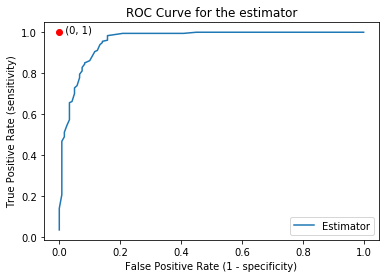

In [8]:
# Now let's use matplotlib to plot the function
plt.plot(fpr,tpr)
plt.plot(0,1,'ro')
plt.legend(['Estimator'])
plt.annotate(f'  ({0}, {1})',xy = (0,1))
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curve for the estimator')

The highlighted point $\left(0,1\right)$ is the *ideal* point. At this point, we would have the *ideal* estimator, as we discussed before. At this threshold, the estimator would have a **True Positive Rate** of $1$ and a **False Positive Rate** of $0$. As mentioned before, such estimator cannot exist in real applications. However, the closest the point is to the point $\left(0,1\right)$, the better will be the decisions your estimator will make. Conversely, the farthest the point is from the *ideal point*, less discriminative will be your classification. 

Now let's consider an extreme case: the **random guesser**! 

The *random guesser* is an estimator that $r$, that, for every point $x$, will randomnly and uniformly choose a value in the interval $\left[0,1\right]$. Therefore, this estimator has **no predictive value**! In other words, the value it outputs for a given point $x$ says **nothing** about which class it belongs to! 

Now, let's implement the **random guesser**!

In [9]:
# Run this cell
def random_guesser(x):
    # For every point x, it returns a random point between 0 and 1. 
    # Note that it do not use any information about the point x!
    return round(np.random.rand(),2) 

For each class labels $y$, let's generate a random prediction value and store it in a list. 

In [10]:
random_predictions = [random_guesser(x) for x in y] 
print(random_predictions[:20])

[0.37, 0.95, 0.73, 0.6, 0.16, 0.16, 0.06, 0.87, 0.6, 0.71, 0.02, 0.97, 0.83, 0.21, 0.18, 0.18, 0.3, 0.52, 0.43, 0.29]


Now let's compute the fpr and tpr lists again.

In [11]:
# Run this cell 
random_tpr = [] 
random_fpr = [] 
for th in np.arange(0,1,0.01):
    random_tpr.append(get_tpr(y,random_predictions,th))
    random_fpr.append(get_fpr(y,random_predictions,th))

And finally, let's draw the ROC Cruve for this predictior, together with the prediction for the previous predictor!

Text(0.5, 1.0, 'ROC Curves for the estimators')

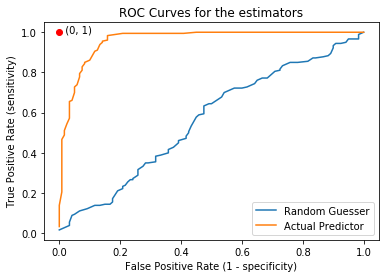

In [12]:
# Now let's use matplotlib to plot the function
plt.plot(random_fpr,random_tpr)
plt.plot(fpr,tpr)
plt.legend(['Random Guesser','Actual Predictor'])
plt.plot(0,1,'ro')
plt.annotate(f'  ({0}, {1})',xy = (0,1))
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curves for the estimators')

As you can see, the **random guesser** behaves almost linear. This happens because, since the predictor cannot properly split the classes, the $0$'s and $1$'s are uniformly distributed over every prediction threshold, so, as we increase the threshold, this linearly increases the $FPR$ and $TPR$. So, the closest the curve is from the identity curve, the less predictive power has the predictor. Usually, we plot a dotted diagonal line from $\left(0,1\right)$ to $\left(0,1\right)$, to indicate that anything close to that dotted line has very weak (or hasn't at all) predictive power. 

Text(0.5, 1.0, 'ROC Curves for the estimators')

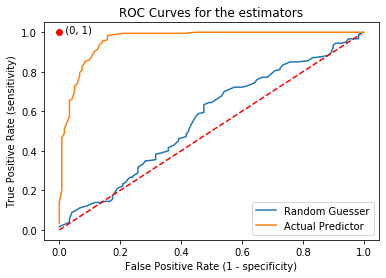

In [13]:
# Now let's use matplotlib to plot the function
plt.plot(random_fpr,random_tpr)
plt.plot(fpr,tpr)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01), 'r--')
plt.legend(['Random Guesser','Actual Predictor'])
plt.plot(0,1,'ro')
plt.annotate(f'  ({0}, {1})',xy = (0,1))
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curves for the estimators')

## A Practical Example 

Now, let's deal with another dataset. 

In [14]:
y_2 = np.loadtxt('data/y_true_unbalanced_set.txt')
pred_2 = np.loadtxt('data/pred_unbalanced_set.txt')

In [15]:
print(f"Proportion of positives: {np.sum(y_2==1)/len(y_2)}")
print(f"Proportion of negatives: {np.sum(y_2==0)/len(y_2)}")

Proportion of positives: 0.08
Proportion of negatives: 0.92


Now the classes are highly unbalanced! Only $8\%$ of examples are in the positive class. Let's suppose $th = 0.5$ and get the metrics again.

In [16]:
pred_2_threshold = pred_2 >= 0.5

TN = np.sum((y_2 == 0) & (pred_2_threshold == 0))
TP = np.sum((y_2 == 1) & (pred_2_threshold == 1))
FN = np.sum((y_2 == 1) & (pred_2_threshold == 0))
FP = np.sum((y_2 == 0) & (pred_2_threshold == 1))

In [17]:
print(f"Number of examples: {len(y_2)}\nNumber of True Negatives: {TN}\nNumber of True Positives: {TP}\nNumber of False Negatives: {FN}\nNumber of False Positives: {FP}")

Number of examples: 300
Number of True Negatives: 276
Number of True Positives: 2
Number of False Negatives: 22
Number of False Positives: 0


Well, this looks like a very bad estimator! Very good at classifying the negative class, but not when classifying the positive ones. The metrics are:

In [18]:
# Cell 21
FPR = get_fpr(y_2,pred_2)
TPR = get_tpr(y_2,pred_2)
precision = TP/(TP+FP)

print(f"FPR (1 - specificity): {FPR:.4f}\nTPR (sensitivity or recall): {TPR:.4f}\nPrecision: {precision:.4f}\nSpecificity: {(1-FPR):.4f}")

FPR (1 - specificity): 0.0000
TPR (sensitivity or recall): 0.0833
Precision: 1.0000
Specificity: 1.0000


This is indeed a very precise estimator, since every examples that it classified as positive is in fact positive! On the other hand, it only was able to identify around $8\%$ of every positive class. Quite bad, right? Let's take a look at the ROC Curve.

In [19]:
tpr_2 = [] 
fpr_2 = [] 
for th in np.arange(0,1,0.01):
    tpr_2.append(get_tpr(y_2,pred_2,th))
    fpr_2.append(get_fpr(y_2,pred_2,th))

Text(0.5, 1.0, 'ROC Curves for the estimators')

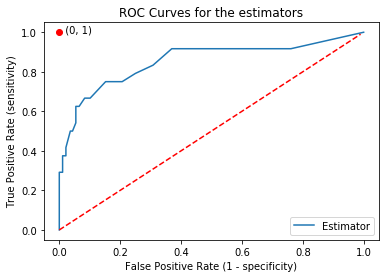

In [20]:
# Now let's use matplotlib to plot the function
plt.plot(fpr_2,tpr_2)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01), 'r--')
plt.legend(['Estimator'])
plt.plot(0,1,'ro')
plt.annotate(f'  ({0}, {1})',xy = (0,1))
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curves for the estimators')

As we mentioned before, the closer the curve is to the *ideal point*, the better will be the estimator. Let's try to find the closest point of the ROC Curve to the point $\left(0,1\right)$ and get the threshold that is associated with this point. For this, we need the euclidean distance function. 

In [21]:
def euclidean_distance(x,y):
    """
    Compute the euclidean distance between two vectors in R2
    Args:
        x,y (np.array or list or tuple): R2 vectors
    Returns:
        d (float): The euclidean distance between x and y
    """
    d = ((x[0] - y[0])**2 + (x[1] - y[1])**2)**0.5
    return d

For this, we need to store the threshold and its related point in the ROC Curve. We can do this by making a small modification in the code on cell $123$.

In [22]:
# We will build a list with the following structure: [(threshold, associated point on ROC Curve)]
examples_and_thresholds = []
for th in np.arange(0,1,0.01):
    examples_and_thresholds.append(((th,(get_fpr(y_2,pred_2,th),get_tpr(y_2,pred_2,th)))))


In [23]:
examples_and_thresholds[0]

(0.0, (1.0, 1.0))

Now, for every point in this list we will compute the euclidean distance between it and the ideal point $\left(0,1\right)$.

In [24]:
threshold_and_distances = []
for th,point in examples_and_thresholds:
    threshold_and_distances.append((th,euclidean_distance((0,1),point),point))
    


Now we just have to sort the list using the distance as key!

In [25]:
threshold_and_distances.sort(key = lambda x: x[1])

In [26]:
print(f"The chosen threshold therefore is {threshold_and_distances[0][0]}")

The chosen threshold therefore is 0.08


Therefore, the clostest point to the ideal point is the one that is generated by the threshold of $0.08$, i.e., we should classify a point to be positive if it predicted value is greater or equal $0.08$ and $0$ otherwise! Let's take a look where this point is in the ROC Curve!

Text(0.5, 1.0, 'ROC Curves for the estimators')

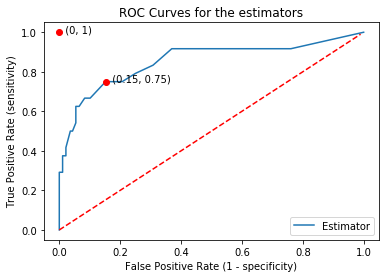

In [27]:
# Now let's use matplotlib to plot the function
plt.plot(fpr_2,tpr_2)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01), 'r--')
plt.legend(['Estimator'])
plt.plot(0,1,'ro')
plt.plot(*threshold_and_distances[0][2], 'ro')
plt.annotate(f'  ({0}, {1})',xy = (0,1))
plt.annotate(f'  ({threshold_and_distances[0][2][0]:.2f}, {threshold_and_distances[0][2][1]:.2f})',xy = threshold_and_distances[0][2])
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curves for the estimators')

Finally, let's have a look on the metrics this new threshold gives us!

In [28]:
pred_2_threshold = pred_2 >= 0.08

TN = np.sum((y_2 == 0) & (pred_2_threshold == 0))
TP = np.sum((y_2 == 1) & (pred_2_threshold == 1))
FN = np.sum((y_2 == 1) & (pred_2_threshold == 0))
FP = np.sum((y_2 == 0) & (pred_2_threshold == 1))

In [29]:
print(f"Number of examples: {len(y_2)}\nNumber of True Negatives: {TN}\nNumber of True Positives: {TP}\nNumber of False Negatives: {FN}\nNumber of False Positives: {FP}")

Number of examples: 300
Number of True Negatives: 234
Number of True Positives: 18
Number of False Negatives: 6
Number of False Positives: 42


It looks a bit better! Finally, let's have a look on the TPR, FPR, Sensitivity, Specificity, and Precision

In [30]:
FPR = get_fpr(y_2,pred_2,0.08)
TPR = get_tpr(y_2,pred_2,0.08)
precision = TP/(TP+FP)

print(f"FPR (1 - specificity): {FPR:.4f}\nTPR (sensitivity or recall): {TPR:.4f}\nPrecision: {precision:.4f}\nSpecificity: {(1-FPR):.4f}")

FPR (1 - specificity): 0.1522
TPR (sensitivity or recall): 0.7500
Precision: 0.3000
Specificity: 0.8478


If you compare with the results in `Cell 21`, this is a nice improvement! Of course, the precision dropped down, but overall the predictions are better. There is no right answer here, if a False Positive is very expensive, we may want sacrifice the recall to increase precision, by increasing the threshold. 

Congratulations, you have finished this ungraded lab!